## The following code generates the Mapper graph (also Reeb graph) using kepler-mapper


The Mapper Algorithm:
1. Map to a lower-dimensional space using a filter function f, or lens. Common choices for the filter function include projection onto one or more axes via PCA or density-based methods. 

2. Construct a cover $(U_i)_{i\in I}$ of the projected space typically in the form of a set of overlapping intervals which have constant length.

3. For each interval $U_i$  cluster the points in the preimage $f^{-1}(U_i)$ into sets $C_{i,1},\ldots,C_{i,k_i}$.

4. Construct the graph whose vertices are the cluster sets and an edge exists between two vertices if two clusters share some points in common.

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/git-repos/tda-digits/scripts'

Mounted at /content/drive/
/content/drive/My Drive/git-repos/tda-digits/scripts


In [1]:
!pip install kmapper

In [2]:
import kmapper as km
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn import cluster
from kmapper import jupyter 

In [3]:
retina_original_data = loadmat('retina-201205_bgonlyb50RelNormconsecDel142.mat')['X']
retina_original_data.shape
X1 = retina_original_data[:,0,:]
X1.shape

(698, 264)

In [12]:
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_X1 = mapper.fit_transform(X1,
    projection=[
                # TruncatedSVD(n_components=100,
                #              random_state=1729),
                Isomap(n_components=3,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()])
print("SHAPE",projected_X1.shape)

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: Isomap(n_components=3, n_jobs=-1)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (698, 264)

..Projecting data using: 
	Isomap(n_components=3, n_jobs=-1)

SHAPE (698, 3)


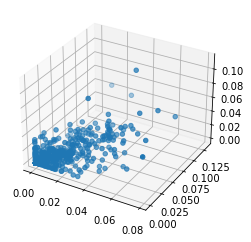

In [14]:
ax = plt.axes(projection ="3d")
ax.scatter3D(X1[:,0], X1[:,1], X1[:,2])
# plt.scatter(X1[:,0], X1[:,1])

In [21]:
graph = mapper.map(projected_X1,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=2,
                                                             linkage="complete",
                                                             affinity="cosine"),)

Mapping on data shaped (698, 3) using lens shaped (698, 3)

Minimal points in hypercube before clustering: 2
Creating 1000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

   > Found 2 clusters in hypercube 2.
Cube_3 is empty.

Cube_4 is empty.

   > Found 2 clusters in hypercube 5.
Cube_6 is empty.

   > Found 2 clusters in hypercube 7.
Cube_8 is empty.

   > Found 2 clusters in hypercube 9.
Cube_10 is empty.

   > Found 2 clusters in hypercube 11.
   > Found 2 clusters in hypercube 12.
   > Found 2 clusters in hypercube 13.
Cube_14 is empty.

   > Found 2 clusters in hypercube 15.
Cube_16 is empty.

Cube_17 is empty.

Cube_18 is empty.

   > Found 2 clusters in hypercube 19.
Cube_20 is empty.

Cube_21 is empty.

Cube_22 is empty.

   > Found 2 clusters in hypercube 23.
   > Found 2 clusters in hypercube 24.
Cube_25 is empty.

   > Found 2 clusters in hypercube 26.
Cube_27 is empty.

Cube_28 is empty.

   > Found 2 clusters in hypercube 29.
   > Found 2 clusters in hypercube 30.
   > F

In [22]:
html = mapper.visualize(graph,
                        path_html="retina1.html",
                        X=projected_X1,
                        title="Retina TDA for Stimuli Type 1",)
jupyter.display(path_html="retina1.html")

Wrote visualization to: retina1.html


C:\Users\ifisa\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: Isomap(n_components=3, n_jobs=-1)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (698, 264)

..Projecting data using: 
	Isomap(n_components=3, n_jobs=-1)

SHAPE (698, 3)
Mapping on data shaped (698, 3) using lens shaped (698, 3)

Minimal points in hypercube before clustering: 2
Creating 1000 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

   > Found 2 clusters in hypercube 2.
   > Found 2 clusters in hypercube 3.
   > Found 2 clusters in hypercube 4.
   > Found 2 clusters in hypercube 5.
Cube_6 is empty.

   > Found 2 clusters in hypercube 7.
   > Found 2 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 2 clusters in hypercube 11.
   > Found 2 clusters in hypercube 12.
   > Found 2 clusters in hypercube 13.
Cube_14 is empty.

   > Found 2 clusters in hypercube 15.
   > Found 2 clusters in hypercube 16.
   > Found 2 clus

C:\Users\ifisa\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


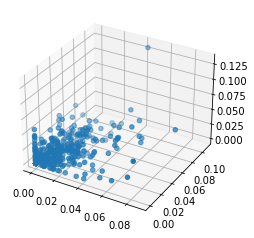

In [23]:
X2 = retina_original_data[:,1,:]
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_X2 = mapper.fit_transform(X2,
    projection=[
                # TruncatedSVD(n_components=100,
                #              random_state=1729),
                Isomap(n_components=3,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()])
print("SHAPE",projected_X2.shape)
ax = plt.axes(projection ="3d")
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
graph = mapper.map(projected_X2,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=2,
                                                             linkage="complete",
                                                             affinity="cosine"),)
html = mapper.visualize(graph,
                        path_html="retina2.html",
                        X=projected_X2,
                        title="Retina TDA for Stimuli Type 2",)
jupyter.display(path_html="retina2.html")

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: Isomap(n_components=3, n_jobs=-1)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (698, 264)

..Projecting data using: 
	Isomap(n_components=3, n_jobs=-1)

SHAPE (698, 3)
Mapping on data shaped (698, 3) using lens shaped (698, 3)

Minimal points in hypercube before clustering: 2
Creating 1000 hypercubes.
Cube_0 is empty.

   > Found 2 clusters in hypercube 1.
   > Found 2 clusters in hypercube 2.
   > Found 2 clusters in hypercube 3.
   > Found 2 clusters in hypercube 4.
Cube_5 is empty.

Cube_6 is empty.

   > Found 2 clusters in hypercube 7.
   > Found 2 clusters in hypercube 8.
   > Found 2 clusters in hypercube 9.
   > Found 2 clusters in hypercube 10.
   > Found 2 clusters in hypercube 11.
   > Found 2 clusters in hypercube 12.
   > Found 2 clusters in hypercube 13.
   > Found 2 clusters in hypercube 14.
   > Found 2 clusters in hypercube 15.
   > Found 2 clusters in hypercube 1

C:\Users\ifisa\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


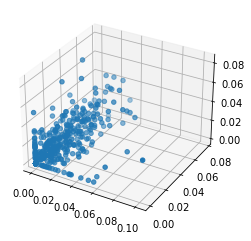

In [33]:
X4 = retina_original_data[:,3,:]
# Initialize
mapper = km.KeplerMapper(verbose=2)

# Fit to and transform the data
projected_X4 = mapper.fit_transform(X4,
    projection=[
                # TruncatedSVD(n_components=100,
                #              random_state=1729),
                Isomap(n_components=3,
                       n_jobs=-1)],
    scaler=[None, None, MinMaxScaler()])
print("SHAPE",projected_X4.shape)
ax = plt.axes(projection ="3d")
ax.scatter3D(X4[:,0], X4[:,1], X4[:,2])
graph = mapper.map(projected_X4,
                   clusterer=cluster.AgglomerativeClustering(n_clusters=2,
                                                             linkage="complete",
                                                             affinity="cosine"),)
html = mapper.visualize(graph,
                        path_html="retina4.html",
                        X=projected_X4,
                        title="Retina TDA for Stimuli Type 4",)
jupyter.display(path_html="retina4.html")